# Shooting Project 
#### Name: Preeyanuch Suphasueb
#### student ID: 61070306
#### Adviser: Teerapong Leelanupab

In [1]:
import json
import urllib
import urllib.request
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium

## Choose Open Web API ##

ใน assignment นี้ได้เลือกนำข้อมูลมาจาก https://opendata.cityofnewyork.us/ ที่เป็นแหล่ง Web API 
ซึ่งให้ข้อมูลประวัติเหตุกาณ์การยิงกันที่เกิดขึ้นภายใน Newyork City ตั้งแต่ปีค.ศ. 2006 จนถึงปีค.ศ. 2018
(NYPD Shooting Incident Data (Historic)-https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8)
ข้อมูลที่ดึงมานี้มีรายละเอียดของเหตุการณ์กราดยิงทุกครั้งที่เกิดขึ้นในนิวยอร์คย้อนกลับไปในปีค.ศ. 2006 จนถึงสิ้นปีค.ศ. 2018  ข้อมูลนี้จะถูกดึงออกมาทุกไตรมาส และได้รับการตรวจสอบโดยสำนักงานวิเคราะห์ และวางแผนการจัดการก่อนที่จะโพสต์บนเว็บไซต์ NYPD(New York City Police Department) บันทึกแต่ละรายการแสดงถึงเหตุการณ์กราดยิงในนิวยอร์ค และรวมถึงข้อมูลเกี่ยวกับเหตุการณ์สถานที่และเวลาที่เกิดขึ้น นอกจากนี้ยังรวมข้อมูลที่เกี่ยวข้องกับข้อมูลประชากรผู้ต้องสงสัยและเหยื่อ ประชาชน

## Collect Data From My Web API ##

ในส่วนของข้อมูลได้ทำการนำ URL ที่ให้ข้อมูลมาจาก https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8 และใช้วิธีการ urllib request เพื่อดาวน์โหลดข้อมูลจาก HTTP URL

In [2]:
url = "https://data.cityofnewyork.us/resource/833y-fsy8.json" # url variable เป็นตัวแปรที่เก็ยข้อมูลของ url ที่ต้องการจะใช้ในการดึงข้อมูล
response = urllib.request.urlopen(url) # shooting_json variable เป็นตัวแปรที่เก็บคำสั่งในการเรียกอ่านข้อมูลจาก response variable
shooting_json = response.read().decode("utf-8") # response variable เป็นตัวแปรที่เก็ยคำสั่้ง urllib request เพื่อใช้ดาวน์โหลดข้อมูลจาก HTTP URL
#print(shooting_json) #แสดงข้อมูลที่ดาวน์โหลดมาได้จาก shooting_json variable

หลังจากดึงข้อมูลมาจาก Web API เรียบร้อยแล้วจะทำการ save file เก็บไว้ใน folder ที่ชื่อว่า \data\ เพื่อทำการ Data Staging

In [3]:
 # เป็นการ save file shooting_json ไปใน folder data ด้วยคำสั่ง open('data\shooting_json', 'w') เพื่อเขียนไฟล์ลงใน folder data
with open('data\shooting.json', 'w') as outfile:
    json.dump(shooting_json, outfile)

## Pre Processing ##

เมื่อทำ Data Staging ไว้ใน folder data แล้วจะทำการ load ไฟล์ข้อมูลนั้นมาใช้ในการวิเคราะห์ด้วยคำสั่งด้านล่างนี้

In [4]:
shooting = json.loads(shooting_json) # คำสั่งใช้ในการ load ข้อมูลมาใช้จาก folder data
#shooting

หลังจากที่ทำการ load ข้อมูลมาใช้เรียบร้อยแล้วจะทำการ normalize ข้อมูลเพื่อให้อยู่ในรูปของ Dataframe เพื่อนำไปใช้ในการวิเคราะห์ได้ง่ายมากขึ้น

In [5]:
df_shooting = json_normalize(shooting) #ใช้คำสั่ง json_normalize จาก semi-structured JSON data ไปเป็น flat table หรือ dataframe 
#เพื่อให้อ่านข้อมูลได้สะดวกมากขึ้น และเก็บ dataframe นี้ไว้ในชื่อ df_shooting
df_shooting.head(10) #ใช้คำสั่ง df_shooting.head(10) ในการแสดงข้อมูล 10 ตัวแรก

<ipython-input-5-a8715584698c>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_shooting = json_normalize(shooting) #ใช้คำสั่ง json_normalize จาก semi-structured JSON data ไปเป็น flat table หรือ dataframe


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,geocoded_column.type,geocoded_column.coordinates,perp_age_group,perp_sex,perp_race,location_desc
0,74146165,2010-08-14T00:00:00.000,3:11:00,QUEENS,113,0,False,25-44,M,BLACK,...,41,3,47,71,Point,"[-73.77534099699994, 40.66891477200004]",NaN,NaN,NaN,NaN
1,66928846,2009-10-17T00:00:00.000,18:03:00,BROOKLYN,67,0,True,45-64,M,BLACK,...,61,2,26,40,Point,"[-73.93130224699998, 40.65087729100002]",NaN,NaN,NaN,NaN
2,29114164,2007-05-18T00:00:00.000,23:00:00,BROOKLYN,75,0,False,25-44,M,BLACK,...,45,2,25,47,Point,"[-73.884529479, 40.65033205800006]",NaN,NaN,NaN,NaN
3,85180336,2012-06-09T00:00:00.000,17:15:00,BROOKLYN,81,0,False,25-44,M,BLACK,...,69,2,17,52,Point,"[-73.92303235699995, 40.68452304300007]",NaN,NaN,NaN,NaN
4,73405770,2010-06-27T00:00:00.000,4:14:00,BRONX,47,0,False,25-44,M,BLACK,...,29,5,2,30,Point,"[-73.85786021699995, 40.88947350500007]",NaN,NaN,NaN,NaN
5,33397043,2007-07-26T00:00:00.000,23:05:00,QUEENS,110,0,False,18-24,M,BLACK,...,66,3,5,68,Point,"[-73.88560822899994, 40.74420426600005]",NaN,NaN,NaN,NaN
6,185483181,2018-07-21T00:00:00.000,4:15:00,QUEENS,114,0,False,25-44,M,BLACK,...,39,3,33,72,Point,"[-73.92884875, 40.75498753]",25-44,M,BLACK,NaN
7,137804320,2014-07-20T00:00:00.000,1:40:00,QUEENS,113,0,False,18-24,M,BLACK,...,41,3,47,71,Point,"[-73.76319392399995, 40.668618676000044]",NaN,NaN,NaN,NaN
8,82323802,2011-12-25T00:00:00.000,3:50:00,QUEENS,113,0,False,18-24,M,BLACK,...,41,3,46,71,Point,"[-73.79888153399997, 40.67445888000003]",NaN,NaN,NaN,NaN
9,74568517,2010-09-11T00:00:00.000,21:40:00,BRONX,43,0,False,18-24,M,BLACK,...,58,5,31,26,Point,"[-73.87519150199995, 40.82788868500006]",NaN,NaN,NaN,NaN


ผลลัพธ์จาก output ด้านบนแสดงให้เห็นว่าข้อมูลยังต้องถูก clean ก่อนนำไปใช้วิเคราะห์ทั้งชื่อคอลัมน์, ค่า NAN และค่า value ในแต่ละคอลัมน์ที่ต้องวิเคราะห์

In [6]:
df_shooting.info() #คำสั่งในการดูข้อมูลพื้นฐานของ dataframe 
#เพื่อดูภาพรวมของข้อมูล จำนวนข้อมูลทั้งหมด คอลัมภ์ทั้งหมด ประเภทของข้อมูลทั้งหมด

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   incident_key                 1000 non-null   object
 1   occur_date                   1000 non-null   object
 2   occur_time                   1000 non-null   object
 3   boro                         1000 non-null   object
 4   precinct                     1000 non-null   object
 5   jurisdiction_code            1000 non-null   object
 6   statistical_murder_flag      1000 non-null   bool  
 7   vic_age_group                1000 non-null   object
 8   vic_sex                      1000 non-null   object
 9   vic_race                     1000 non-null   object
 10  x_coord_cd                   1000 non-null   object
 11  y_coord_cd                   1000 non-null   object
 12  latitude                     1000 non-null   object
 13  longitude                    1000 

output จากด้านบนจะเห็นได้ว่ามีข้อมูลจำนวนทั้งหมด 1000 rows และมีคอลัมน์ทั้งหมด 25 columns ประเภทข้อมูลเป็น object เกือบทั้งหมด และมี bool อยู่อีก 1 คอลัมน์ เป็นการดูภาพรวมเพื่อวิเคราะห์ในการเลือก clean data

## clean data

เริ่มทำความสะอาดข้อมูลโดยเริ่มจากเปลี่ยนชื่อคอลัมภ์บางคอลัมภ์ที่ไม่มีความหมาย และเข้าใจยาก ให้สามารถเข้าใจได้ง่ายมากขึ้น 

In [7]:
#คำสั่ง df_shooting.rename(columns = ['Old Column Name':'New Column Name']) เป็นการเปลี่ยนชื่อของคอลัมน์ใน dataframe
#inplace = True เป็นการแทนที่แบบไม่ต้องมีตัวแปรมารับ / nothing is returned
df_shooting.rename(columns = {'boro':'borough',
                              'precinct':'police_precinct',
                              'x_coord_cd':'x_plane',
                              'y_coord_cd':'y_plane',
                              ':@computed_region_efsh_h5xi':'zip_codes',
                              ':@computed_region_f5dn_yrer':'community_districts',
                              ':@computed_region_yeji_bk3q':'borough_boundaries',
                              ':@computed_region_92fq_4b7q':'city_council_districts',
                              ':@computed_region_sbqj_enih':'precinct',
                              'geocoded_column.type':'geocoded_type',
                              'geocoded_column.coordinates':'geocoded_coordinates'}, inplace = True)

In [8]:
df_shooting.columns.values.tolist() #ใช้คำสั่งนี้เพื่อแสดง list ของคอลัมภ์ทั้งหมดหลังจากถูกเปลี่ยนชื่อแล้วเรียบร้อย

['incident_key',
 'occur_date',
 'occur_time',
 'borough',
 'police_precinct',
 'jurisdiction_code',
 'statistical_murder_flag',
 'vic_age_group',
 'vic_sex',
 'vic_race',
 'x_plane',
 'y_plane',
 'latitude',
 'longitude',
 'zip_codes',
 'community_districts',
 'borough_boundaries',
 'city_council_districts',
 'precinct',
 'geocoded_type',
 'geocoded_coordinates',
 'perp_age_group',
 'perp_sex',
 'perp_race',
 'location_desc']

จาก output จะเห็นได้ว่าชื่อคอลัมภ์มีความหมายที่เข้าใจได้มากขึ้นไม่เป็นภาษาที่อ่านไม่ออก
มาทำความเข้าใจกับแต่ละคอลัมน์กันเถอะ ~

ความหมายของแต่ละคอลัมภ์

incident_key คือ เลข ID แบบสุ่มของแต่ละการเกิดเหตุโดย incident key แต่ละอันแสดงถึงเหยื่อเป็นหลัก                
occur_date คือ วันที่เกิดเหตุการณ์กราดยิง                      
occur_time คือ เวลาที่เกิดเหตุการณ์กราดยิง                      
borough คือ เขตที่เกิดเหตุการณ์กราดยิง                            
police_precinct คือ พื้นที่ที่เกิดเหตุกราดยิง(เป็นรหัสของพื้นที่ปกครองของตำรวจใน NYPD https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page)                       
jurisdiction_code คือ เขตอำนาจศาลที่เกิดเหตุกราดยิง (รหัสเขตอำนาจศาล 0 = ตระเวน, 1 = การขนส่ง, 2 = ที่อยู่อาศัย และ 3 แสดงถึงเขตอำนาจศาลอื่นๆที่ไม่ใช่ NYPD)                
statistical_murder_flag คือ เป็นการฆาตกรรม(การยิงที่ทำให้เหยื่อเสียชีวิต False = เหยื่อไม่เสียชีวิต, True = เหยื่อเสียชีวิต)           
vic_age_group คือ ช่วงอายุของเหยื่อ                 
vic_sex คือ เพศของเหยื่อ                         
vic_race คือ เผ่าพันธุ์ของเหยื่อ                       
x_plane คือ พิกัดของเฮลิคอปเตอร์ในแกน x                     
y_plane คือ พิกัดของเฮลิคอปเตอร์ในแกน y                   
latitude คือ พิกัดละติจูดของพื้นที่บนโลกเมื่อเกิดเหตุ                      
longitude  คือ พิกัดลองจิจูดของพื้นที่บนโลกเมื่อเกิดเหตุ                        
zip_codes คือ รหัสไปรษณีย์ของพื้นที่เกิดเเหตุ  
community_districts คือ รหัสของย่านชุมชนที่เกิดเหตุ    
borough_boundaries คือ ขอบเขตของเขตที่เกิดเหตุ   
city_council_districts คือ เขตเทศบาลเมืองที่เกิดเหตุ    
precinct คือ รหัสพื้นที่ที่เกิดเหตุ    
geocoded_type คือ ประเภทของพิกัดทางภูมิศาสตร์ ณ ที่เกิดเหตุ          
geocoded_coordinates คือ พิกัดของละติจูด และลองจิจูด ณ ที่เกิดเหตุ  
perp_age_group คือ ช่วงอายุของคนร้าย                
perp_sex คือ เพศของคนร้าย                      
perp_race คือ เชื้อชาติของคนร้าย                     
location_desc คือ คำอธิบายสถานที่เกิดเหตุ

In [9]:
df_shooting

,incident_key,occur_date,occur_time,borough,police_precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,community_districts,borough_boundaries,city_council_districts,precinct,geocoded_type,geocoded_coordinates,perp_age_group,perp_sex,perp_race,location_desc
0,74146165,2010-08-14T00:00:00.000,3:11:00,QUEENS,113,0,False,25-44,M,BLACK,...,41,3,47,71,Point,"[-73.77534099699994, 40.66891477200004]",NaN,NaN,NaN,NaN
1,66928846,2009-10-17T00:00:00.000,18:03:00,BROOKLYN,67,0,True,45-64,M,BLACK,...,61,2,26,40,Point,"[-73.93130224699998, 40.65087729100002]",NaN,NaN,NaN,NaN
2,29114164,2007-05-18T00:00:00.000,23:00:00,BROOKLYN,75,0,False,25-44,M,BLACK,...,45,2,25,47,Point,"[-73.884529479, 40.65033205800006]",NaN,NaN,NaN,NaN
3,85180336,2012-06-09T00:00:00.000,17:15:00,BROOKLYN,81,0,False,25-44,M,BLACK,...,69,2,17,52,Point,"[-73.92303235699995, 40.68452304300007]",NaN,NaN,NaN,NaN
4,73405770,2010-06-27T00:00:00.000,4:14:00,BRONX,47,0,False,25-44,M,BLACK,...,29,5,2,30,Point,"[-73.85786021699995, 40.88947350500007]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,82157674,2011-12-13T00:00:00.000,10:09:00,QUEENS,101,0,False,18-24,M,BLACK,...,51,3,47,59,Point,"[-73.78441919999993, 40.593768616000034]",18-24,M,BLACK,COMMERCIAL BLDG
996,85127160,2012-06-06T00:00:00.000,12:48:00,QUEENS,113,0,False,25-44,M,BLACK,...,41,3,6,71,Point,"[-73.78449435899995, 40.69320713200006]",18-24,M,BLACK,NaN
997,85910307,2012-07-24T00:00:00.000,19:33:00,BROOKLYN,77,0,False,18-24,M,BLACK,...,16,2,48,49,Point,"[-73.93511008699994, 40.67081759000007]",NaN,NaN,NaN,NaN
998,91744329,2013-07-21T00:00:00.000,22:25:00,BROOKLYN,77,0,False,25-44,M,BLACK,...,16,2,17,49,Point,"[-73.92964991099996, 40.66966980800004]",NaN,NaN,NaN,NaN


จาก output จะพบว่า index ของ dataframe นี้ค่อนข้างที่จะไม่เป็นระเบียบเลยเลือกที่จะเปลี่ยนชื่อ index ดูสวยงามเข้าใจได้ง่าย

In [10]:
index_sort = [i for  i in range(1000)]
df_shooting.index = index_sort
df_shooting.index    

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

ต่อไปจะทำการเลือกลบคอลัมน์ precinct, borough_boundaries, x_plane, y_plane, zip_codes, geocoded_type, jurisdiction_code, community_districts, city_council_districts, geocoded_coordinates, police_precinct   เนื่องจากทั้งคอลัมน์ทั้งหมดนี้ไม่ใช้ในการวิเคราะ์ข้อมูลในภายหลัง 

In [11]:
# ทำการเลือกลบคอลัมน์โดยใช้คำสั่ง df_shooting.drop(['Column Name'], axis=1) 
#โดยใช้ axis=1 เนื่องจากต้องการลบ column ถ้าหากต้องการลบ row ถึงเลือกใช้ axis=0
df_shooting = df_shooting.drop(['precinct', 'borough_boundaries','x_plane','y_plane','zip_codes','geocoded_type','jurisdiction_code','community_districts','city_council_districts','geocoded_coordinates','police_precinct'], axis=1)

หลังจากนั้นจะทำการ clean ข้อมูลที่เป็น Missing Data(Null Data)

In [12]:
df_shooting.isnull().sum() # ใช้คำสั่ง df_shooting.isnull().sum() เพื่อหาจำนวนของค่า null ในแต่ละคอลัมภ์ภายใน dataframe

incident_key                 0
occur_date                   0
occur_time                   0
borough                      0
statistical_murder_flag      0
vic_age_group                0
vic_sex                      0
vic_race                     0
latitude                     0
longitude                    0
perp_age_group             350
perp_sex                   348
perp_race                  348
location_desc              579
dtype: int64

จาก output ด้านบนจะพบว่าคอลัมภ์ location_desc, perp_age_group, perp_sex และ perp_race มีค่า null อยู่เป็นจำนวนมาก โดยเฉพาะคอลัมภ์ location_desc เนื่องจากมีค่า null มากเกินไป และไม่ใช้สำหรับการวิเคราะห์ข้อมูลในภายหลังจึงเลือกลบข้อมูลทั้งคอลัมน์

In [13]:
df_shooting = df_shooting.drop(['location_desc'], axis=1) #ทำการเลือกลบคอลัมน์ location_desc โดยใช้คำสั่ง df_shooting.drop(['Column Name'], axis=1)

แต่ภายในคอลัมน์ perp_age_group, perp_sex และ perp_race ยังคงมีค่า null อยู่จึงทำการลบ missing value เหล่านั้นออกก่อนทำไปวิเคราะห์

In [14]:
# ทำการลบ missing value ทั้งหมดภายในคอลัมน์ perp_age_group, perp_sex และ perp_race ด้วยคำสั่ง df_shooting.dropna()
df_shooting = df_shooting.dropna()

In [15]:
df_shooting.isnull().sum() #เรียกใช้คำสั่งนี้เพื่อแสดงค่า null ภายในแต่ละคอลัมน์  

incident_key               0
occur_date                 0
occur_time                 0
borough                    0
statistical_murder_flag    0
vic_age_group              0
vic_sex                    0
vic_race                   0
latitude                   0
longitude                  0
perp_age_group             0
perp_sex                   0
perp_race                  0
dtype: int64

จาก output ด้านบนจะไม่พบค่า null ภายในคอลัมน์ perp_age_group, perp_sex และ perp_race แล้ว

In [16]:
df_shooting['occur_date'].head(100) # ใช้คำสั่ง df_shooting['ColName'].head(num))เพื่อเรียกดูข้อมูลภายใน dataframe 100 ตัวแรก

6      2018-07-21T00:00:00.000
14     2010-10-03T00:00:00.000
21     2010-07-02T00:00:00.000
22     2014-03-08T00:00:00.000
24     2010-08-09T00:00:00.000
                ...           
163    2009-07-04T00:00:00.000
164    2009-08-02T00:00:00.000
165    2013-12-10T00:00:00.000
166    2013-04-16T00:00:00.000
168    2006-03-18T00:00:00.000
Name: occur_date, Length: 100, dtype: object

จาก output ด้านบนจะพบว่าข้อมูลในคอลัมภ์ occur_date จะเป็นข้อมูลวันเดือนปี ที่มีเวลา timestamp เพิ่มมาด้วยโดยจะแบ่งเป็นตัวที่ 0-9 ตัวแรกเป็นข้อมูลที่เราต้องการคือ วันเดือนปีที่เกิดเหตุ และตัวที่ 10 เป็นต้นไปคือ timestamp ที่จะต้องทำการตัดทิ้งเนื่องจากเรามีคอลัมภ์ occur_time อยู่แล้ว และ timestamp นั้นมีค่าเป็น 0 ทั้งหมด

In [17]:
occur_date2 = [] #สร้าง list ใหม่ที่ชื่อว่า occur_date2 เพื่อต้องการเก็บข้อมูลวันเดือนปีหลังจากตัดส่วน timestamp ทิ้งไปแล้ว
for i in df_shooting['occur_date']: #ทำการวนลูป for โดยที่ให้ i เป็นข้อมูลแต่ละตัวที่อยู่ในคอลัมน์ occur_date
    date = i[0:10]                  #ให้ตัวแปร date คือ ข้อมูลแต่ละตัวที่อยู่ในคอลัมน์ occur_date ตั้งแต่ตัวที่ 0-9
    occur_date2.append(date)        #นำ date เข้าไปเก็บไว้ใน list ที่ชื่อว่า occcur_date2 ด้วยคำสั่ง listname.append()
df_shooting['occur_date2'] = occur_date2 
#ทำการสร้างคอลัมน์ใหม่ใน dataframe ที่ชืื่อว่า occur_date2 ด้วยข้อมูลจาก occur_date2 เป็น list ที่เราทำการเก็บข้อมูลวันเดือนปีไว้

หลังจากทำการตัด timestamp ทิ้งแล้วเก็บข้อมูลวันเดือนปีไว้ในคอลัมน์ occur_date2 เราจึงลบข้อมูลภายในคอลัมน์ occur_date

In [18]:
#เนื่องจากเราไม่ต้องการใช้ข้อมูลภายในคอลัมน์ occur_date แล้วจึงทำการลบคอลัมน์นั้นทิ้ง
df_shooting = df_shooting.drop(['occur_date'], axis=1) #โดยใช้คำสั่ง df_shooting.drop(['Column Name'], axis=1)

In [19]:
df_shooting['occur_date2'].head(5) #เรียกดูข้อมูล 5 ตัวแรกในคอลัมน์ occur_date2 

6     2018-07-21
14    2010-10-03
21    2010-07-02
22    2014-03-08
24    2010-08-09
Name: occur_date2, dtype: object

จาก output ด้านบนจะเห็นได้ว่าข้อมูลภายในคอลัมน์ occur_date2 ไม่มีเวลา timestamp แล้วแต่ยังต้องการแบ่งข้อมูลออกเป็น 3 คอลัมน์เพื่อให้ง่ายต่อการวิเคราะห์มากขึ้นโดยแบ่งคอลัมน์ดังนี้ Year, Month, Day

In [20]:
#ทำการแบ่งคอลัมน์ occur_date2 ออกเป็น 3 คอลัมน์คือ Year, Month, Day
#เนื่องจากข้อมูลมีภายในคอลัมน์ occur_date2 มีค่าเป็น YYYY-MM-DD จึงทำการตัดข้อมูลออกเป็น 3 คอลัมน์ด้วย '-'

df_shooting[['Year','Month','Day']] = df_shooting['occur_date2'].str.split("-",expand=True) 

#สร้างคอลัมน์ใหม่ที่มีชื่อ Year, Month, Day โดยให้มีค่าเท่ากับคอลัมน์ occur_date2 ที่ทำการตัดข้อมูลจาก '-' ด้วยคำสั่ง df_shooting['ColName'].str.split("-",expand=True) 
# expand=True คือ เมื่อเราทำการ split string แยกเป็นแต่ละคอลัมน์แล้วต้องการให้ return ผลลัพธ์เป็น dataframe 
# expand=False คือ เมื่อเราทำการ split string แยกเป็นแต่ละคอลัมน์แล้วต้องการให้ return ผลลัพธ์เป็น series

In [21]:
df_shooting[['Year','Month','Day']] #แสดงข้อมูลในคอลัมน์ Year, Month, Day

,Year,Month,Day
6,2018,07,21
14,2010,10,03
21,2010,07,02
22,2014,03,08
24,2010,08,09
...,...,...,...
993,2011,07,18
994,2017,07,11
995,2011,12,13
996,2012,06,06


จาก output จะพบว่าข้อมูล วันเดือนปีถูกแบ่งออกในแต่ละคอลัมน์เรียบร้อยแล้ว

ต่อไปจะทำการวิเคราะห์ value ในแต่ละคอลัมน์ว่ามีค่า null หรือ ค่าที่ผิดปกติหรือไม่เนื่องจากข้อมูลที่เราต้องการใช้เป็น categorical 

เริ่มจากวิเคราะห์ value ภายในคอลัมน์ perp_age_group

In [22]:
df_shooting['perp_age_group'].value_counts() #ใช้คำสั่ง df_shooting['ColName'].value_counts() เพื่อเรียกดู value ของคอลัมน์ perp_age_group 

18-24      243
25-44      176
UNKNOWN    147
<18         64
45-64       17
65+          2
1020         1
Name: perp_age_group, dtype: int64

จากการแสดง output ด้านบนทำให้เห็นว่าคอลัมน์ perp_age_group มีค่า value ที่ต้องลบทิ้ง คือ 'UNKNOWN' และ '1020' ที่มีค่า null และมีค่าช่วงอายุที่มากผิดปกติ ไม่เป็นความจริง(outlier) ด้วยคำสั่งด้านล่างนี้

In [23]:
perp_age = df_shooting[df_shooting['perp_age_group'] == '1020'].index 
#ให้ตัวแปร perp_age มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ perp_age_group = '1020' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(perp_age, inplace = True) #ทำการลบ index ที่มี value ในคอลัมน์ perp_age_group = '1020'
perp_age2 = df_shooting[df_shooting['perp_age_group'] == 'UNKNOWN'].index
#ให้ตัวแปร perp_age2 มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ perp_age_group = 'UNKNOWN' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(perp_age2, inplace = True)
#ทำการลบ index ที่มี value ในคอลัมน์ perp_age_group = 'UNKNOWN'

In [24]:
df_shooting['perp_age_group'].value_counts() #เรียกดู value ภายในคอลัมน์ perp_age_group

18-24    243
25-44    176
<18       64
45-64     17
65+        2
Name: perp_age_group, dtype: int64

จะเห็นได้ว่า output เมื่อทำการเรียกดู value ของคอลัมน์ perp_age_group ไม่มี value 'UNKNOWN' และ '1020' แล้ว

ต่อไปจะทำการวิเคราะห์ value ภายในคอลัมน์ perp_sex

In [25]:
df_shooting['perp_sex'].value_counts() #ใช้คำสั่ง df_shooting['Column Name'].value_counts()เพื่อทำการเรียกดู value ของคอลัมน์ perp_sex

M    491
F     10
U      1
Name: perp_sex, dtype: int64

จะเห็นได้ว่าจาก output เมื่อทำการเรียกดู value ของคอลัมน์ perp_sex จะพบ value 'U' ที่ไม่ใช่ค่าที่แสดงเพศชาย หรือ หญิงจึงต้องทำการลบทิ้ง

In [26]:
perp_sex = df_shooting[df_shooting['perp_sex'] == 'U'].index
#ให้ตัวแปร perp_sex มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ perp_sex = 'U' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(perp_sex, inplace = True)
#ทำการลบ index ที่มี value ในคอลัมน์ perp_sex = 'U'

In [27]:
df_shooting['perp_sex'].value_counts()  #เรียกดู value ภายในคอลัมน์ perp_sex

M    491
F     10
Name: perp_sex, dtype: int64

จะเห็นได้ว่า output เมื่อทำการเรียกดู value ของคอลัมน์ perp_sex ไม่มี value 'U' แล้ว

ต่อไปจะทำการวิเคราะห์ value ภายในคอลัมน์ perp_race

In [28]:
df_shooting['perp_race'].value_counts() #ใช้คำสั่ง df_shooting['Column Name'].value_counts() เพื่อทำการเรียกดู value ของคอลัมน์ perp_race

BLACK                       367
WHITE HISPANIC               72
BLACK HISPANIC               39
WHITE                        12
UNKNOWN                      10
ASIAN / PACIFIC ISLANDER      1
Name: perp_race, dtype: int64

จาก output เมื่อทำการเรียกดู value ของคอลัมน์ perp_race ทำให้พบ value ที่มีค่า 'UNKNOWN' อยู่ซึ่งจะต้องทำการลบทิ้งเนื่องจากเป็นค่า null

In [29]:
perp_race = df_shooting[df_shooting['perp_race'] == 'UNKNOWN'].index
#ให้ตัวแปร perp_race มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ perp_race = 'UNKNOWN' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(perp_race, inplace = True)
#ทำการลบ index ที่มี value ในคอลัมน์ perp_race = 'UNKNOWN'

In [30]:
df_shooting['perp_race'].value_counts() # เรียกดู value ภายในคอลัมน์ perp_race

BLACK                       367
WHITE HISPANIC               72
BLACK HISPANIC               39
WHITE                        12
ASIAN / PACIFIC ISLANDER      1
Name: perp_race, dtype: int64

จะเห็นได้ว่า output เมื่อทำการเรียกดู value ของคอลัมภ์ perp_race ไม่มี value 'UNKNOWN' แล้ว

ต่อไปจะทำการวิเคราะห์ value ภายในคอลัมน์ vic_age_group

In [31]:
df_shooting['vic_age_group'].value_counts() #ใช้คำสั่ง df_shooting['Column Name'].value_counts()เพื่อทำการเรียกดู value ของคอลัมน์ vic_age_group

18-24      202
25-44      192
<18         53
45-64       38
65+          4
UNKNOWN      2
Name: vic_age_group, dtype: int64

จาก output จะเห็นว่าคอลัมน์ vic_age_group มีค่า value 'UNKNOWN' ที่ต้องลบทิ้งเนื่องจากเป็นค่า null

In [32]:
vic_age = df_shooting[df_shooting['vic_age_group'] == 'UNKNOWN'].index
#ให้ตัวแปร vic_age มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ vic_age_group = 'UNKNOWN' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(vic_age, inplace = True)
#ทำการลบ index ที่มี value ในคอลัมน์ vic_age_group = 'UNKNOWN'

In [33]:
df_shooting['vic_age_group'].value_counts() #เรียกดู value ภายในคอลัมน์ vic_age_group

18-24    202
25-44    192
<18       53
45-64     38
65+        4
Name: vic_age_group, dtype: int64

จะเห็นได้ว่า output เมื่อทำการเรียกดู value ของคอลัมภ์ vic_age_group ไม่มี value 'UNKNOWN' แล้ว

ต่อไปจะทำการวิเคราะห์ value ภายในคอลัมน์ vic_race 

In [34]:
df_shooting['vic_race'].value_counts() #ใช้คำสั่ง df_shooting['Column Name'].value_counts() เพื่อทำการเรียกดู value ของคอลัมน์ vic_race

BLACK                       320
WHITE HISPANIC               89
BLACK HISPANIC               52
WHITE                        20
ASIAN / PACIFIC ISLANDER      8
Name: vic_race, dtype: int64

จาก output ด้านบนเมื่อทำการเรียกดู value ของคอลัมภ์ vic_race จะพบว่าค่า value ' UNKNOWN' ต้องทำการลบทิ้งเนื่องจากเป็นค่า null

In [35]:
vic_race = df_shooting[df_shooting['vic_race'] == 'UNKNOWN'].index
#ให้ตัวแปร vic_race มีค่าเท่ากับ index ตัวที่ value ภายในคอลัมน์ vic_race = 'UNKNOWN' ด้วยคำสั่ง df[df['ColName']== Value].index
df_shooting.drop(vic_race, inplace = True)
#ทำการลบ index ที่มี value ในคอลัมน์ vic_race = 'UNKNOWN'

In [36]:
df_shooting['vic_race'].value_counts() # เรียกดู value ภายในคอลัมน์ vic_race

BLACK                       320
WHITE HISPANIC               89
BLACK HISPANIC               52
WHITE                        20
ASIAN / PACIFIC ISLANDER      8
Name: vic_race, dtype: int64

จะเห็นได้ว่า output เมื่อทำการเรียกดู value ของคอลัมภ์ vic_race ไม่มี value 'UNKNOWN' แล้ว

หลังจาก วิเคราะห์ value แต่ละคอลัมน์เรียบร้อยแล้วจึงใช้คำสั่ง df_info() เพื่อเรียกดูข้อมูลพื้นฐานของ dataframe อีกรอบเพื่อ check ว่าข้อมูลนั้นถูก clean พร้อมใช้ในการวิเคราะห์แล้ว

In [37]:
df_shooting.info() #เรียกดูข้อมูลพื้นฐานของ df_shooting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 6 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incident_key             489 non-null    object
 1   occur_time               489 non-null    object
 2   borough                  489 non-null    object
 3   statistical_murder_flag  489 non-null    bool  
 4   vic_age_group            489 non-null    object
 5   vic_sex                  489 non-null    object
 6   vic_race                 489 non-null    object
 7   latitude                 489 non-null    object
 8   longitude                489 non-null    object
 9   perp_age_group           489 non-null    object
 10  perp_sex                 489 non-null    object
 11  perp_race                489 non-null    object
 12  occur_date2              489 non-null    object
 13  Year                     489 non-null    object
 14  Month                    489 non-null    o

# 5.Visualization table+graph

1.วิเคราะห์เหยื่อแต่ละเพศมีช่วงอายุในช่วงไหน

2.วิเคราะห์เหยื่อแต่ละเพศมีเชื้อชาติอะไร

3.วิเคราะห์คนร้ายแต่ละเพศมีช่วงอายุอยู่ในช่วงไหน

4.วิเคราะห์คนร้ายแต่ละเพศมีเชื้อชาติอะไร

5.เพศของเหยื่อที่เสียชีวิตมากที่สุด

6.ช่วงอายุของเหยื่อที่เสียชีวิตมากที่สุด

7.เชื้อชาติของเหยื่อที่เสียชีวิตมากที่สุด

8.เขตใน เมือง NYC ที่มีจำนวนการเสียชีวิตมากที่สุด

9.พิกัดของผู้รอดชีวิตในแต่ละเขตของเมือง NYC

10.พิกัดของผู้เสียชีวิตในแต่ละเขตของเมือง NYC

11.กราฟจำนวนการเกิดเหตุการณ์ยิงใน NYC ของแต่ละปี

12.วิเคราะห์แต่ละปีมีจำนวนการเสียชีวิตเป็นอย่างไร

## 1.วิเคราะห์เหยื่อแต่ละเพศมีช่วงอายุในช่วงไหน

ต้องการวิเคราะห์ว่าเหยื่อที่ถูกยิงแต่ละเพศมีช่วงอายุไหนที่ถูกยิงมากที่สุด และน้อยที่สุดด้วย heat map

Text(0.5, 1.0, 'VICTIM SEX VS AGE')

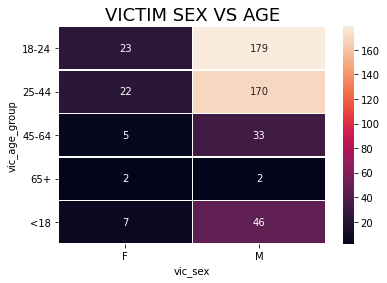

In [38]:
# ให้ vic_sex_age เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ vic_age_group และ vic_sex 
vic_sex_age = pd.crosstab(df_shooting['vic_age_group'],df_shooting['vic_sex']) #ใช้คำสั่ง pd.crosstab(df[col1],df[col2])

#สร้าง heatmap จาก crosstab ระหว่างคอลัมน์ vic_age_group และ vic_sex
sns.heatmap(pd.crosstab(df_shooting['vic_age_group'], df_shooting['vic_sex']), annot=True, cbar=True, fmt="d", linewidth=0.3)
#สร้าง heatmap โดยใช้ seaborn as sns ด้วยคำสั่ง sns.heatmap(pd.crosstab(df[col1],df[col2]))
#annot = True คือ ให้แสดงค่า data value ที่ count ได้
#fmt="d" คือ ให้ data value นั้นมีค่าเป็น int 
#cbar=True คือ ต้องการให้แสดงแถบสีด้านขวาด้วย

# ticks 
yticks = [i.upper() for i in vic_sex_age.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน vic_sex_age  
xticks = [i.upper() for i in  vic_sex_age.columns] #ให้ xticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น columns ของข้อมูลภายใน vic_sex_age 
#ใช้คำสั่ง plt.yticks() เพื่อกำหนดรูปแบบของ ticks 
#labels=yticks คือ ให้ label เป็น list ของข้อมูลที่เราต้องการแสดงคือ yticks
#rotation=0 คือ กำหนดให้ label นั้นมีองศา = 0 คือไม่ต้องเอียง
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0) 
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)

# title
title = 'VICTIM SEX VS AGE' #ให้ตัวแปร title เก็บชื่อ title ของ graph นี้
plt.title(title, loc='center', fontsize=18) #ให้คำสั่ง plt.title() แสดงชื่อ title โดยมี location ที่ center ขนาดฟ้อน = 18

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- เหยื่อที่ถูกยิงมักเป็นเพศชายมากกว่าเพศหญิงโดยดูได้จากสีชมพู คือ มีจำนวนสูงมากกว่าสีม่วง 
- ในฝั่งของเพศชาย มีจำนวนการถูกยิงอยู่ในช่วงอายุ 18-24 ปีมากที่สุด คือ 179 cases และช่วงอายุที่ต่ำสุด คือ 65 ปีขึ้นไปมีเพียง 2 cases
- ในฝั่งของเพศหญิง มีจำนวนการถูกยิงอยู่ในช่วงอายุ 18-24 ปีมากที่สุด คือ 22 cases และช่วงอายุที่ต่ำสุด คือ 65 ปีขึ้นไปมีเพียง 2 cases
- สังเกตเห็นได้ว่าช่วงอายุของเหยื่อทั้งเพศชาย และหญิงที่ถูกยิงมากที่สุด คือ 18-24 ปี หรือ ช่วงวัยรุ่น และน้อยที่สุด คือ 65 ปีขึ้นไป หรือ คนชรา อยู่ในช่วงอายุเหมือนกันรวมถึงในช่วงอายุอื่นก็มีจำนวนการยิงที่เป็นลำดับเหมือนกันระหว่างเพศชาย และหญิงจากมากไปน้อยดังนี้ 18-24 -> 25-44 -> น้อยกว่า 18 -> 45-64 -> 65 ปีขึ้นไป แต่อย่างไรก็ตามเพศชายมีจำนวนการถูกยิงที่มากกว่าเพศหญิงอยู่มาก


## 2.วิเคราะห์เหยื่อแต่ละเพศมีเชื้อชาติอะไร

ต้องการวิเคราะห์ว่าเหยื่อที่ถูกยิงแต่ละเพศมีเชื้อชาติไหนที่ถูกยิงมากที่สุด และน้อยที่สุดด้วย heat map

Text(0.5, 1.0, 'VICTIM SEX VS RACE')

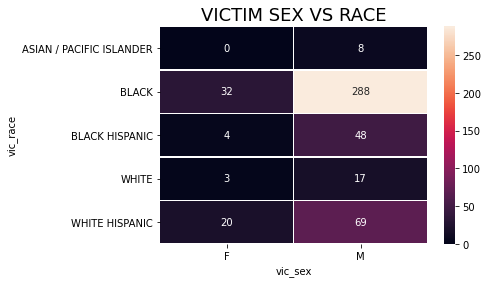

In [39]:
# ให้ vic_sex_race เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ vic_race และ vic_sex 
vic_sex_race = pd.crosstab(df_shooting['vic_race'],df_shooting['vic_sex'])

#สร้าง heatmap จาก crosstab ระหว่างคอลัมน์ vic_race และ vic_sex
sns.heatmap(pd.crosstab(df_shooting['vic_race'], df_shooting['vic_sex']), annot=True, cbar=True, fmt="d" ,linewidth=0.3)

# ticks
yticks = [i.upper() for i in vic_sex_race.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน vic_sex_race
xticks = [i.upper() for i in  vic_sex_race.columns] #ให้ xticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น columns ของข้อมูลภายใน vic_sex_race
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)

# title
title = 'VICTIM SEX VS RACE'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- ในฝั่งของเพศชาย มีจำนวนการถูกยิงที่มีเชื้อชาติ BLACK มากที่สุด คือ 288 cases และเชื้อชาติ ASIAN/PACIFIC ISLANDER น้อยที่สุดโดยมีจำนวน 8 cases
- ในฝั่งของเพศหญิง มีจำนวนการถูกยิงที่มีเชื้อชาติ BLACK มากที่สุด คือ 32 cases และเชื้อชาติ ASIAN/PACIFIC ISLANDER น้อยที่สุดโดยมีจำนวน 0 cases
- สังเกตเห็นได้ว่าเชื้อชาติของเหยื่อทั้งเพศชาย และหญิงที่ถูกยิงมากที่สุด คือ BLACK และน้อยที่สุด คือ ASIAN/PACIFIC ISLANDER เหมือนกัน
- จำนวนเหยื่อที่ถูกยิงทั้งเพศชาย และหญิงมีลำดับจากมากที่สุดไปน้อยสุดเหมือนกันดังนี้ 
    BLACK -> WHITE HISPANIC -> BLACK HISPANIC -> WHITE -> ASIAN/PACIFIC ISLANDER ซึ่งเราจะเห็นได้ว่าเชื้อชาติ BLACK มีจำนวนการถูกยิงที่สูง 

## 3.วิเคราะห์คนร้ายแต่ละเพศมีช่วงอายุอยู่ในช่วงไหน

ต้องการวิเคราะห์ว่าคนร้ายแต่ละเพศมีช่วงอายุไหนมากที่สุด และน้อยที่สุดด้วย heat map

Text(0.5, 1.0, 'PERPETRATOR SEX VS AGE')

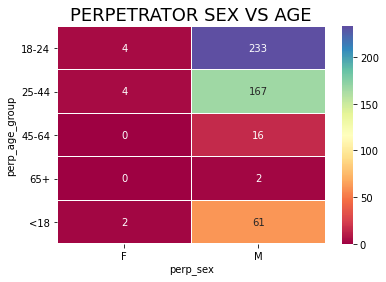

In [40]:
# ให้ perp_sex_age เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ perp_age_group และ perp_sex 
perp_sex_age = pd.crosstab(df_shooting['perp_age_group'],df_shooting['perp_sex'])

#สร้าง heatmap จาก crosstab ระหว่างคอลัมน์ vic_race และ vic_sex
sns.heatmap(pd.crosstab(df_shooting['perp_age_group'], df_shooting['perp_sex']),annot=True, cbar=True, fmt="d", linewidth=0.3, cmap = "Spectral")

# ticks
yticks = [i.upper() for i in perp_sex_age.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน perp_sex_age
xticks = [i.upper() for i in  perp_sex_age.columns] #ให้ xticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น columns ของข้อมูลภายใน perp_sex_age
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)

# title
title = 'PERPETRATOR SEX VS AGE'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า
- คนร้ายเป็นเพศชายมากกว่าเพศหญิงโดยดูได้จากสีน้ำเงินอมม่วง และ value มีจำนวนสูงกว่าเพศหญิง
- ในฝั่งของเพศชาย มีจำนวนคนร้ายในช่วงอายุ 18-24 ปีมากที่สุด คือ 233 cases และ 65 ปีขึ้นไปน้อยที่สุดโดยมีจำนวน 2 cases
- ในฝั่งของเพศหญิง มีจำนวนคนร้ายในช่วงอายุ 18-24 และ 25-44 ปีมากที่สุด คือ 4 cases ช่วงอายุ 45-64 และ 65 ปีขึ้นไปน้อยที่สุดโดยมีจำนวน 0 cases
- สังเกตเห็นได้ว่าช่วงอายุของคนร้ายอยู่ที่ 18-24 ปีมีจำนวนมากที่สุดทั้งเพศชาย และหญิง หรือ คนร้ายยังอยู่ในช่วงวัยรุ่น ยังศึกษาในระดับมหาวิทยาลัยอยู่ รองลงมาจะเป็นช่วงอายุ 25-44 ปี หรือ วัยทำงาน

## 4.วิเคราะห์คนร้ายแต่ละเพศมีเชื้อชาติอะไร

ต้องการวิเคราะห์ว่าคนร้ายแต่ละเพศมีเชื้อชาติอะไรมากที่สุด และน้อยที่สุดด้วย heat map

Text(0.5, 1.0, 'PERPETRATOR SEX VS RACE')

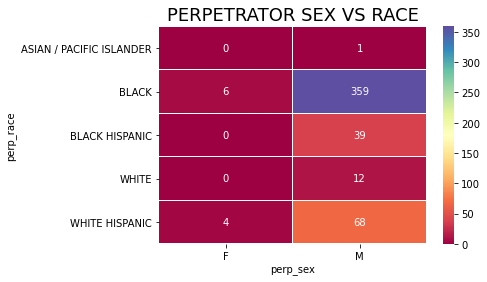

In [41]:
# ให้ perp_sex_race เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ perp_race และ perp_sex 
perp_sex_race = pd.crosstab(df_shooting['perp_race'],df_shooting['perp_sex'])

sns.heatmap(pd.crosstab(df_shooting['perp_race'], df_shooting['perp_sex']),annot=True, cbar=True, fmt="d", linewidth=0.3, cmap = "Spectral")
# ticks
yticks = [i.upper() for i in perp_sex_race.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน perp_sex_race
xticks = [i.upper() for i in  perp_sex_race.columns] #ให้ xticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น columns ของข้อมูลภายใน perp_sex_race
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)

# title
title = 'PERPETRATOR SEX VS RACE'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- ในฝั่งของเพศชาย มีจำนวนการยิงของคนร้ายที่มีเชื้อชาติ BLACK มากที่สุด คือ 359 cases และเชื้อชาติ ASIAN/PACIFIC ISLANDER น้อยที่สุดโดยมีจำนวน 1 cases และมีลำดับเชื้อชาติของคนร้ายจากมากที่สุดไปน้อยที่สุดดังนี้ BLACK -> WHITE HISPANIC -> BLACK HISPANIC -> WHITE -> ASIAN/PACIFIC ISLANDER
- ในฝั่งของเพศหญิง มีจำนวนการยิงของคนร้ายที่มีเชื้อชาติ BLACK มากที่สุด คือ 6 cases และเชื้อชาติ ASIAN/PACIFIC ISLANDER , BLACK HISPANIC และ WHITE น้อยที่สุดโดยมีจำนวน 0 cases และมีลำดับเชื้อชาติของคนร้ายจากมากที่สุดไปน้อยที่สุดดังนี้ BLACK -> WHITE HISPANIC -> BLACK HISPANIC = WHITE = ASIAN/PACIFIC ISLANDER
- สังเกตเห็นได้ว่าเชื้อชาติของคนร้ายทั้งเพศชาย และหญิงมากที่สุด คือ BLACK 
   

สรุปผลจากการวิเคราะห์ทั้ง 4 กราฟที่ผ่านมา

เหยื่อ
- จำนวนเหยื่อที่ถูกยิงมีช่วงอายุมากที่สุดอยู่ในช่วง 18-24 ปี หรือ ในช่วงวัยรุ่น(เรียนมหาวิทยาลัย) มากที่สุดของทั้งเพศชาย และเพศหญิง
- เชื้อชาติเป็น black หรือ คนผิวสี มีจำนวนมากที่สุดของทั้งเพศชาย และเพศหญิง
- จำนวนเหยื่อเพศชาย มากกว่า เพศหญิง

คนร้าย 
- คนร้ายมีอายุในช่วง 18-24 ปี หรือ ในช่วงวัยรุ่น(เรียนมหาวิทยาลัย) และรองลงมาจะเป็นช่วงอายุ 25-44 ปี หรือ วัยทำงานของทั้งเพศชาย และเพศหญิง
- เชื้อชาติของคนร้ายมากที่สุด คือ black หรือ คนผิวสี และ WHITE HISPANIC เป็นเชื้อชาติที่มีจำนวนมากรองลงมาของทั้งเพศชาย และหญิง
- จำนวนคนร้ายเพศชาย มากกว่า เพศหญิง

จะสังเกตเห็นได้ว่า ทั้งเหยื่อและคนร้ายมีจำนวนเพศชายที่มากกว่าเพศหญิงโดยมีอายุอยู่ในช่วงอายุ 18-24 ปี และมีเชื้อชาติเป็นคนผิวสีทั้งเหยื่อ และคนร้ายที่มากที่สุด แต่รองลงมาคือเชื้อชาติ WHITE HISPANIC ทำให้คาดการณ์ได้ว่าอาจเกิดความขัดแย้งระหว่างกันภายในเชื้อชาติ หรือ อาจเป็นความขัดแย้งกันระกว่างคนผิวสีกับคนขาว เนื่องจากปัญหาความขัดแย้งเรื่องการเหยียดสิผิวในอเมริกาที่เป็นปัญหายาวนานของอเมริกา และด้วยอายุที่อยู่ในช่วงวัยรุ่น และเพศชาย ทำให้การขัดแย้งจนรุนแรงถึงขั้นยิงกันได้ในหมู่วัยรุ่นชาย มากกว่าในช่วงอายุหรือเชื้อชาติอื่น 


## 5.เพศของเหยื่อที่เสียชีวิตมากที่สุด

ต้องการวิเคราะห์ว่าเพศของเหยื่อที่เสียชีวิตมากที่สุด ด้วย heat map

Text(0.5, 1.0, 'VICTIM SEX VS DEATH OR NOT')

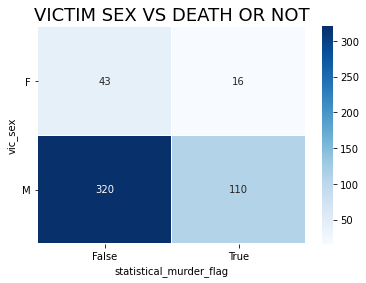

In [42]:
# ให้ death_sex เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ vic_sex และ statistical_murder_flag 
death_sex = pd.crosstab(df_shooting['vic_sex'],df_shooting['statistical_murder_flag'])

sns.heatmap(pd.crosstab(df_shooting['vic_sex'], df_shooting['statistical_murder_flag']),annot=True, cbar=True, fmt="d", linewidth=0.3, cmap = "Blues")

# ticks
yticks = [i.upper() for i in death_sex.index]#ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน perp_sex_race
xticks = [i for i in  death_sex.columns] #ให้ xticks เก็บข้อมูล list of  i โดยที่ i เป็น columns ของข้อมูลภายใน perp_sex_race
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)

# title
title = 'VICTIM SEX VS DEATH OR NOT'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- เหยื่อเพศชาย มีจำนวนการเสียชีวิตมากกว่าเพศหญิง คือ จำนวนการเสียชีวิตฝ่ายชาย = 110 และฝ่ายหญิง = 16
- เหยื่อเพศชาย มีจำนวนการรอดชีวิตมากกว่าเพศหญิง คือ จำนวนการเสียชีวิตฝ่ายชาย = 320 และฝ่ายหญิง = 43
- เหยื่อทั้งเพศชาย และเพศหญิงมีจำนวนการรอดชีวิตมากกว่าเสียชีวิต

## 6.ช่วงอายุของเหยื่อที่เสียชีวิตมากที่สุด

ต้องการวิเคราะห์ว่าช่วงอายุของเหยื่อที่เสียชีวิตมากที่สุด ด้วย heat map

Text(0.5, 1.0, 'VICTIM AGE VS DEATH OR NOT')

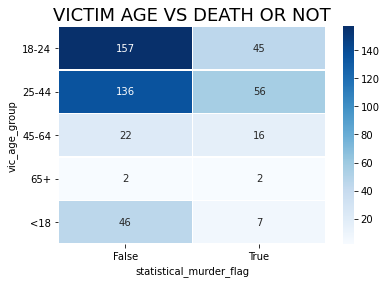

In [43]:
# ให้ death_age เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ vic_age_group และ statistical_murder_flag 
death_age = pd.crosstab(df_shooting['vic_age_group'],df_shooting['statistical_murder_flag'])

sns.heatmap(pd.crosstab(df_shooting['vic_age_group'], df_shooting['statistical_murder_flag']),
             annot=True, cbar=True, fmt="d", linewidth=0.3, cmap = "Blues")
# ticks
yticks = [i.upper() for i in death_age.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน death_age
xticks = [i for i in  death_age.columns] #ให้ xticks เก็บข้อมูล list of  i โดยที่ i เป็น columns ของข้อมูลภายใน death_age
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)
# title
title = 'VICTIM AGE VS DEATH OR NOT'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- ช่วงอายุ 18-24 ปี มีจำนวนการรอดชีวิตสูงที่สุดในทุกช่วงอายุมีจำนวน 157 cases รองลงมาคือ ช่วงอายุ 25-44 ปี และต่ำสุดคือ 65 ปีขึ้นไป
- ช่วงอายุ 25-44 ปี มีจำนวนการเสียชีวิตสูงที่สุดในทุกช่วงอายุมีจำนวน 56 cases รองลงมาคือ ช่วงอายุ 18-24 ปี และต่ำสุดคือ 65 ปีขึ้นไป
- ช่วงอายุของเหยื่อมีจำนวนการรอดชีวิตสูงกว่าที่สูงกว่าเสียชีวิตอยู่มาก สังเกตได้จากสีที่เข้ม(มีจำนวนมาก) กับ สีที่อ่อน(มีจำนวนน้อย)

## 7.เชื้อชาติของเหยื่อที่เสียชีวิตมากที่สุด

ต้องการวิเคราะห์ว่าเชื้อชาติของเหยื่อที่เสียชีวิตมากที่สุด ด้วย heat map

Text(0.5, 1.0, 'VICTIM RACE VS DEATH OR NOT')

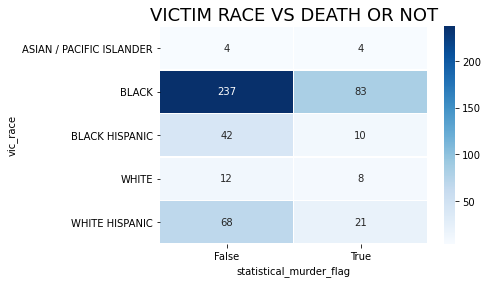

In [44]:
# ให้ death_race เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ vic_race และ statistical_murder_flag 
death_race = pd.crosstab(df_shooting['vic_race'],df_shooting['statistical_murder_flag'])

sns.heatmap(pd.crosstab(df_shooting['vic_race'], df_shooting['statistical_murder_flag']),
             annot=True, cbar=True, fmt="d", linewidth=0.3, cmap = "Blues")
# ticks
yticks = [i.upper() for i in death_race.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน death_race
xticks = [i for i in  death_race.columns] #ให้ xticks เก็บข้อมูล list of  i โดยที่ i เป็น columns ของข้อมูลภายใน death_race
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)
# title
title = 'VICTIM RACE VS DEATH OR NOT'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- เชื้อชาติ BLACK มีจำนวนการรอดชีวิตสูงที่สุดมีจำนวน 237 cases รองลงมาคือ WHITE-HISPANIC และต่ำสุดคือ ASIAN/PACIFIC ISLANDER
- เชื้อชาติ BLACK มีจำนวนการเสียชีวิตสูงที่สุดมีจำนวน 83 cases รองลงมาคือ WHITE-HISPANIC และต่ำสุดคือ ASIAN/PACIFIC 
- เชื้อชาติของเหยื่อมีจำนวนการรอดชีวิตสูงกว่าที่สูงกว่าเสียชีวิตอยู่มาก สังเกตได้จากสีที่เข้ม(มีจำนวนมาก) กับ สีที่อ่อน(มีจำนวนน้อย)

สรุปผลจาก 3 กราฟที่ผ่านมาจะพบว่า
- เหยื่อเพศชาย มีจำนวนการรอดชีวิต และเสียชีวิตมากกว่าเพศหญิง แต่มีจำนวนการรอด มากกว่า เสียชีวิต
- เหยื่อที่รอดชีวิตสูงที่สุดมีอายุในช่วงอายุ 18-24 ปี รองลงมาคือ ช่วงอายุ 25-44 ปี และต่ำสุดคือ 65 ปีขึ้นไป
- เหยื่อที่เสียชีวิตสูงที่สุดมีอายุในช่วงอายุ 25-44 ปี มีรองลงมาคือ ช่วงอายุ 18-24 ปี และต่ำสุดคือ 65 ปีขึ้นไป
- เหยื่อที่มีเชื้อชาติ BLACK มีจำนวนการรอด และเสียชีวิตสูงที่สุด รองลงมาคือ WHITE-HISPANIC และต่ำสุดคือ ASIAN/PACIFIC ISLANDER 
ดังนั้นจะแสดงได้ว่า เหยื่อเพศชายที่มีอายุในช่วง 18-24 ปี และมีเชื้อชาติผิวสีมีจำนวนการรอดชีวิตมากกว่า และเหยื่อเพศชายที่มีอายุในช่วง 25-44 ปี และมีเชื้อชาติผิวสีมีจำนวนการเสียชีวิตที่มากกว่า อาจเนื่องจากเมื่อมีอายุมากขึ้นทำให้การทนรับต่อความบาดเจ็บของแผลได้น้อยลงมากกว่าคนในวัยรุ่น และในเรื่องของสภาวะแทรกซ้อนต่อการได้รับบาดเจ็บมีที่มีมากกว่าเมื่อช่วงอายุเริ่มสูงขึ้น

## 8.เขตใน เมือง NYC ที่มีจำนวนการเสียชีวิตมากที่สุด

ต้องการวิเคราะห์ว่าแต่ละเขตใน NewYork City เขตไหนจำนวนการเสียชีวิตมากที่สุด

Text(0.5, 1.0, 'BOROUGH VS DEATH OR NOT')

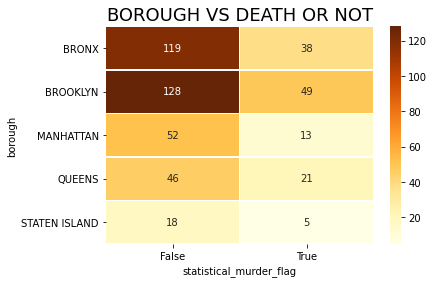

In [45]:
# ให้ death_borough เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ borough และ statistical_murder_flag 
death_borough = pd.crosstab(df_shooting['borough'],df_shooting['statistical_murder_flag'])

sns.heatmap(pd.crosstab(df_shooting['borough'], df_shooting['statistical_murder_flag']),
             annot=True, cbar=True,fmt="d" ,linewidth=0.3, cmap = 'YlOrBr')
# ticks
yticks = [i.upper() for i in death_borough.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน death_borough
xticks = [i for i in  death_borough.columns] #ให้ xticks เก็บข้อมูล list of  i โดยที่ i เป็น columns ของข้อมูลภายใน death_borough
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)
# title
title = 'BOROUGH VS DEATH OR NOT'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์ของกราฟ heatmap แสดงให้เห็นว่า 
- เขต Brooklyn มีจำนวนการรอดชีวิตที่สูงที่สุดคือ 128 cases รองคนมาคือ Bronx และต่ำสุดคือ Staten Island
-  Brooklyn มีจำนวนการเสียชีวิตที่สูงที่สุดคือ 49 cases รองคนมาคือ Bronx และต่ำสุดคือ Staten Island
- ในแต่ละเขตจะมีจำนวนการรอดชีวิตมากกว่าเสียชีวิต
จะสังเกตุเห็นได้ว่าเขต Brooklyn มีจำนวนการรอด และเสียชีวิตมากที่สุด เนื่องจากเขตนี้เป็นเขตที่มีขนาดของประชากรหนาแน่นที่สุดในเมือง NYC จึงทำให้มีจำนวนผู้ถูกยิงมากกว่าเขตอื่นๆ

## 9.พิกัดของผู้รอดชีวิตในแต่ละเขตของเมือง NYC

ต้องการสร้างแผนที่แสดงพิกัดทางภูมิศาสตร์เพื่อว่าพิกัดตำแหน่งของผู้รอดชีวิตในแต่ละเขตเพื่อเป็นการดูในภาพรวม

In [46]:
#Map
#ให้ map_hooray เป็น map ที่มี location คือ ละติจูด และลองจิจูด ที่เป็น center ของแผนที่ของสถานที่ต้องการด้วยคำสั่ง folium.Map()
map_hooray = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

#Marker
#สร้าง marker ของแต่ละเขต โดยให้ location เป็นละติจูด และลองจิจูดของเขตนั้นๆ ด้วยคำสั่ง folium.Marker() 
#และทำการเพิ่มเข้าไปใน map_hooray ด้วยคำสั่ง .add_to(map_hooray)
#popup คือ ต้องการให้ Marker มีเนื้อหาอะไรเมื่อคลิกบน Marker นั้น
#icon=folium.Icon(color='color') กำหนดสีให้ Marker นั้น
folium.Marker([40.650002, -73.949997],popup=('Brooklyn'+'\n' +'Number 1 survival'),icon=folium.Icon(color='green')).add_to(map_hooray)

folium.Marker([40.837048, -73.865433], popup=('Bronx'+'\n' +'Number 2 survival'),icon=folium.Icon(color='red')).add_to(map_hooray)

folium.Marker([40.742054, -73.769417], popup=('Queens'+'\n' +'Number 4 survival'),icon=folium.Icon(color='pink')).add_to(map_hooray)

folium.Marker([40.78343, -73.96625], popup=('Manhattan'+'\n' + 'Number 3 survival'),icon=folium.Icon(color='orange')).add_to(map_hooray)

folium.Marker([40.579021, -74.151535], popup=('Staten Island'+'\n'+ 'Number 5 survival'), icon=folium.Icon(color='purple')).add_to(map_hooray)

# ให้วนลูป for ไปใน dataframe df_shooting คอลัมน์ statistical_murder_flag ที่มีค่าเป็น false หรือ รอดชีวิต
for (index, row) in df_shooting[df_shooting['statistical_murder_flag'] == False].iterrows():
    folium.Circle(location=[row['latitude'] ,row['longitude']], radius=10,color ='#1142D8', fill_color='#1142D8').add_to(map_hooray)
# ให้สร้างพิกัดเป็นวงกลมบน map_hooray ด้วยคำสั่ง folium.Circle()
# ให้ location = row ของคอลัมน์ latitude และ longitude 
# radius คือ ขนาดของวงกลมบนพื้นที่ ,color  คือ สีของวงกลม fill_color คือ จะใส่สีเข้าไปในวงกลมถ้าไม่ใส่สีจะไม่เปลี่ยนแปลง
map_hooray

จากจุด Marker สีต่างๆ แสดงให้เห็นถึงเขตแต่ละเขตใน NYC ดังนี้
- สีแดง เขต Bronx
- สีส้ม เขต Manhattan
- สีชมพู เขต Queens
- สีเขียว เขต Brooklyn
- สีม่วง เขต Staten Island

โดยจุดสีน้ำเงินแต่ละจุดจะแสดงพิกัดของคนที่รอดชีวิตในเขตแต่ละเขตของเมือง NYC ซึ่งจากผลลัพธ์ในการวิเคราะห์จากหัวข้อ 8 แสดงให้เห็นว่า เมือง Brooklyn หรือ Marker สีเขียว มีจำนวนผู้เสียชีวิตมากที่สุด รองลงมาคือ Bronx Manhattan Queens และ Staten Island ตามลำดับ

## 10.พิกัดของผู้เสียชีวิตในแต่ละเขตของเมือง NYC

ต้องการสร้างแผนที่แสดงพิกัดทางภูมิศาสตร์เพื่อว่าพิกัดตำแหน่งของผู้เสียชีวิตในแต่ละเขตเพื่อเป็นการดูในภาพรวม

In [47]:
#Map
map_hooray = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

#Marker
folium.Marker([40.650002, -73.949997],('Brooklyn'+'\n' +'Number 1 death'),icon=folium.Icon(color='green')).add_to(map_hooray)

folium.Marker([40.837048, -73.865433], ('Bronx'+'\n' +'Number 2 death'),icon=folium.Icon(color='red')).add_to(map_hooray)

folium.Marker([40.742054, -73.769417], ('Queens'+'\n' +'Number 3 death'),icon=folium.Icon(color='pink')).add_to(map_hooray)

folium.Marker([40.78343, -73.96625], ('Manhattan'+'\n' + 'Number 4 death'),icon=folium.Icon(color='orange')).add_to(map_hooray)

folium.Marker([40.579021, -74.151535], ('Staten Island'+'\n'+ 'Number 5 death'), icon=folium.Icon(color='purple')).add_to(map_hooray)

# ให้วนลูป for ไปใน dataframe df_shooting คอลัมน์ statistical_murder_flag ที่มีค่าเป็น true หรือ เสียชีวิต
for (index, row) in df_shooting[df_shooting['statistical_murder_flag'] == True].iterrows():
    folium.Circle(location=[row['latitude'] ,row['longitude']], radius=10,color ='#1142D8', fill_color='#1142D8').add_to(map_hooray)
map_hooray

จากจุด Marker สีต่างๆ แสดงให้เห็นถึงเขตแต่ละเขตใน NYC ดังนี้
- สีแดง เขต Bronx
- สีส้ม เขต Manhattan
- สีชมพู เขต Queens
- สีเขียว เขต Brooklyn
- สีม่วง เขต Staten Island

โดยจุดสีน้ำเงินแต่ละจุดจะแสดงพิกัดของคนที่เสียชีวิตในเขตแต่ละเขตของเมือง NYC ซึ่งจากผลลัพธ์ในการวิเคราะห์จากหัวข้อ 8 แสดงให้เห็นว่า เมือง Brooklyn หรือ Marker สีเขียว มีจำนวนผู้เสียชีวิตมากที่สุด รองลงมาคือ Bronx Queens Manhattan และ Staten Island ตามลำดับ

## 11.กราฟจำนวนการเกิดเหตุการณ์ยิงใน NYC ของแต่ละปี

ต้องการสร้างกราฟของจำนวนการเกิดเหตุการณ์ยิงกันใน NYC ของแต่ละปีว่ามีจำนวน cases ที่เกิดมากน้อยอย่างไร

In [48]:
df_shooting.groupby('Year').count() #ใช้คำสั่ง df_groupby('column name').count() 
#เพื่อทำการรวมข้อมูลภายในแต่ละปีของคอลัมน์ Year

,incident_key,occur_time,borough,statistical_murder_flag,vic_age_group,vic_sex,vic_race,latitude,longitude,perp_age_group,perp_sex,perp_race,occur_date2,Month,Day
Year,,,,,,,,,,,,,,,
2006,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2007,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
2008,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2009,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2010,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2011,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
2012,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
2013,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2014,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39


จากผลลัพธ์ด้านบนทุกคอลัมน์มีค่าเท่ากันจึงเลือกมา 1 คอลัมน์เพื่อนำมา plot กราฟ

In [49]:
#ทำการเลือกคอลัมน์ incident_key มา plot ด้วยคำสั่ง df_groupby('column name'1)['column name2'].count() 
df_shooting.groupby('Year')['incident_key'].count()

Year
2006    54
2007    53
2008    54
2009    31
2010    33
2011    42
2012    38
2013    37
2014    39
2015    28
2016    22
2017    30
2018    28
Name: incident_key, dtype: int64

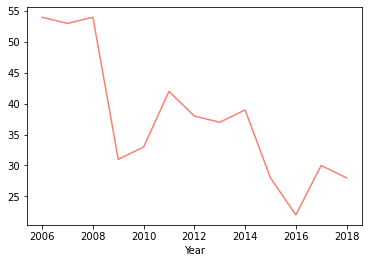

In [50]:
#ใช้คำสั่ง df_groupby('column name'1)['column name2'].count().plot() เพื่อ plot ให้เป็นกราฟเส้น
df_shooting.groupby('Year')['statistical_murder_flag'].count().plot(color='salmon');

จากกราฟที่แสดงด้านบน จะสังเกตเห็นได้ว่าในปี 2006 และ 2008 มีจำนวนของการเกิดเหตุการณ์การยิงกันมากที่สุดโดยมีจำนวน 54 cases และค่อยๆลดลงมาเรื่อยๆจนถึงปี 2009 และค่อยๆเพิ่มสูงขึ้นจนถึงปี 2011 โดยมีจำนวน 42 cases และค่อยๆลงลงและเพิ่มสูงขึ้นอีกในปี 2014 มีจำนวน 39 cases ซึ่งน้อยกว่าปีที่ผ่านมา จากนั้นมีการลดจำนวนการเกิดเหตุลงจนถึงปี 2016 มีจำนวนทั้งสิ้น 22 cases และมีจำนวนสูงขึ้นอีกในปี 2017 มีเพียง 30 cases และลดลงในปี 2018

## 12.วิเคราะห์แต่ละปีมีจำนวนการเสียชีวิตเป็นอย่างไร

ต้องการวิเคราะห์ว่าแต่ละปีที่เกิดเหตุการยิงมีจำนวนผู้เสียชีวิต และรอดชีวิตเป็นอย่างไร

Text(0.5, 1.0, 'YEAR VS DEATH OR NOT')

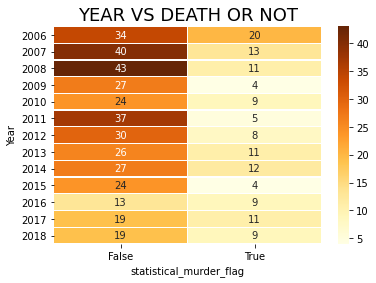

In [51]:
# ให้ year_death เป็นตัวแปรเก็บ crosstab ระหว่างคอลัมน์ Year และ statistical_murder_flag 
year_death = pd.crosstab(df_shooting['Year'],df_shooting['statistical_murder_flag'])

sns.heatmap(pd.crosstab(df_shooting['Year'], df_shooting['statistical_murder_flag']),
             annot=True, cbar=True,fmt="d" ,linewidth=0.3, cmap = 'YlOrBr')
# ticks
yticks = [i.upper() for i in year_death.index] #ให้ yticks เก็บข้อมูล list of  i ตัวใหญ่ทั้งหมดโดยที่ i เป็น index ของข้อมูลภายใน year_death
xticks = [i for i in  year_death.columns]#ให้ xticks เก็บข้อมูล list of  i โดยที่ i เป็น columns ของข้อมูลภายใน year_death
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks, rotation=0)
# title
title = 'YEAR VS DEATH OR NOT'
plt.title(title, loc='center', fontsize=18)

จากผลลัพธ์กราฟ heat map จะพบว่า
- ปี 2008 มีจำนวนผู้รอดชีวิตมากที่สุด รองลงมาคือปี 2007 ต่ำสุดในปี 2013
- ปี 2006 มีจำนวนผู้เสียชีวิตมากที่สุด รองลงมาคือปี 2006 ต่ำสุดในปี 2009 และ 2015
- แต่ทุกปีมีจำนวนของผู้รอดชีวิตมากกว่าเสียชีวิต

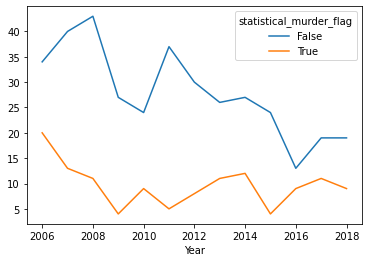

In [52]:
year_death.plot() #ทำการสร้างฟราฟเส้นของตัวแปร year_death ที่เก็บ crosstab ระหว่างคอลัมน์ Year และ statistical_murder_flag 

จากผลลัพธ์ของกราฟเส้นนี้จะเห็นได้ว่าจำนวนของผู้รอดชีวิตมีจำนวนสูงที่สุดในปี 2008 ในขณะที่จำนวนผู้เสียชีวิตในปี 2006 มีจำนวนสูงที่สุด และสังเกตุได้ว่าในปีหลังๆทั้งจำนวนของผู้รอดชีวิต และเสียชีวิตมีจำนวนลดลงจากปีก่อนๆ หรือ บอกได้ว่าจำนวนการเกิดเหตุการณ์ยิงกันค่อยๆลดลง สำหรับจำนวนผู้รอดชีวิตค่อนข้างเริ่มคงที่อยู่ที่ 19 cases และจำนวนผู้เสียชีวิตมีแนวโน้มลดลงใน 2 ปีหลังคือปี 2017 และ 2018 